iterations =  1351
iterations =  1384


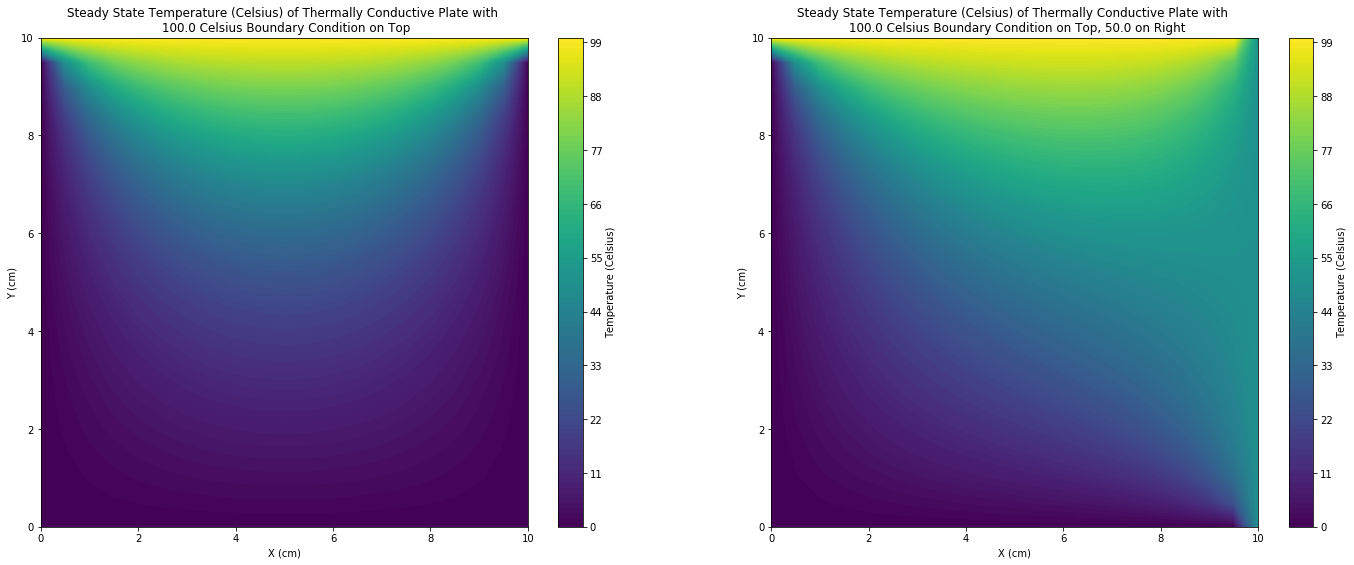

In [2]:
"""
    This script solves the laplace equation with different Boundary Conditions to show the steady state 
    temperature of a conductive 10cm by 10cm sheet in the x y plane. It then plots a contour map with
    the color representing the temperature in degrees celsius for the two different boundary conditions.
    
    This code was taken from the poisson demo and modified.
"""

import numpy as np
import matplotlib
import matplotlib.pyplot as plt


# Grid size and resolution, L is in cm, N is number of points, h is the spacing between points
L = 10.0
N = 21
h = L/(N-1)

# building the meshgrid
x = np.linspace(0,L,N)
y = np.linspace(0,L,N)
Y, X = np.meshgrid(y,x)


# Solution to the laplace equation is just 0 everywhere
solution = np.zeros((N,N))

# initial guess for the Temp and set up boundary conditions. Guess 0 everywhere first and then make top
# row all 100.0 degrees celsius
T = np.zeros((N,N))
T[:,-1] = 100.0

# setting solver for the Laplace equation
iterations = 0
eps = 1e-8
error =  2.0*eps #I know error > eps, this is a dummy error to allow while-loop to start
ntotal = 1e4
# This while loop stops onces the error is larger than eps, and iterations is larger than ntotal. These values comes
# from the poisson demo
while iterations < ntotal and error > eps:
    T_temp = np.copy(T)
    error = 0.0
    for j in range(1,N-1):   # this is to avoid updating the boundaries and cancelling out the boundary conditions
        for i in range(1,N-1):
            # This comes from the taylor expansion and is a way to solve the laplace equation
            T[i,j] = 0.25* (T_temp[i+1,j] + T_temp[i-1,j] + T_temp[i,j-1] + T_temp[i,j+1] + solution[i,j])
            error += abs(T[i,j]-T_temp[i,j])
            
    iterations += 1
    error /= float(N**2)

# Plots the first contour map
print('iterations = ',iterations)    
plt.figure(figsize=(24,9))
plt.subplot(1,2,1)
plt.contourf(X, Y, T, 100)
plt.title("Steady State Temperature (Celsius) of Thermally Conductive Plate with \n 100.0 Celsius Boundary Condition on Top")
plt.colorbar().set_label('Temperature (Celsius)')
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')

"""
    Now we change the boundary conditions and resolve the laplace equation with the new boundary conditions in place.
"""

# initial guess for the Temp and set up boundary conditions
T = np.zeros((N,N))
T[:,-1] = 100.0
T[-1,:] = 50.0

# setting solver for the Laplace equation
iterations = 0
eps = 1e-8
error =  2.0*eps #I know error > eps, this is a dummy error to allow while-loop to start
ntotal = 1e4
# This while loop stops onces the error is larger than eps, and iterations is larger than ntotal. These values
# come from the poisson demo.
while iterations < ntotal and error > eps:
    T_temp = np.copy(T)
    error = 0.0
    for j in range(1,N-1):   # this is to avoid updating the boundaries and cancelling out the boundary conditions
        for i in range(1,N-1):
            # Comes from the Taylor Expansion and is a way to solve the laplace equation
            T[i,j] = 0.25* (T_temp[i+1,j] + T_temp[i-1,j] + T_temp[i,j-1] + T_temp[i,j+1] + solution[i,j])
            error += abs(T[i,j]-T_temp[i,j]) 
    iterations += 1
    error /= float(N**2)

print('iterations = ',iterations) 
# Plots the second contour map
plt.subplot(1,2,2)
plt.contourf(X, Y, T, 100)
plt.title("Steady State Temperature (Celsius) of Thermally Conductive Plate with \n 100.0 Celsius Boundary Condition on Top, 50.0 on Right")
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
plt.colorbar().set_label('Temperature (Celsius)')
plt.show()
